In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def inv(alpha):
    return (np.tan(alpha) - alpha)

def get_geometry(m_n, z, x, alpha_n):
    d_ref = z * m_n
    d_a = d_ref + 2*m_n*(x+1)
    d_f = d_ref + 2*m_n*(x-1.25)
    d_b = d_ref*np.cos(alpha_n)
    s_ref = m_n*(np.pi/2 + 2*x*np.tan(alpha_n))
    s_b = d_b*(s_ref/d_ref + inv(alpha_n))
    return d_ref, d_a, d_f, d_b, s_ref, s_b

def get_alpha(distance, r_b):
    return np.arctan2(distance, r_b)

def get_theta(distance, r_b):
    return distance/r_b

def get_r(r_b, alpha):
    return r_b/np.cos(alpha)

def get_phi(alpha):
    return inv(alpha)

In [6]:
m_n1 = 6
z1 = 31
x1 = 0.3
alpha_n = np.radians(20)

z2 = 66
x2 = 0

a = 294

In [7]:
d_ref1, d_a1, d_f1, d_b1, s_ref1, s_b1 = get_geometry(m_n1, z1, x1, alpha_n)
d_ref2, d_a2, d_f2, d_b2, s_ref2, s_b2 = get_geometry(m_n1, z2, x2, alpha_n)
print(d_b1/2,d_b2/2)

87.39141373308948 186.05913891560988


In [8]:
alpha_tw = np.arccos((1/a)*(d_b1+d_b2)/2)
g_alpha =  np.sqrt((d_a1/2)**2 - (d_b1/2)**2) + np.sqrt((d_a2/2)**2 - (d_b2/2)**2) - (d_b1+d_b2)*np.tan(alpha_tw)/2

In [9]:
p_b = np.pi*m_n1
eta_alpha = g_alpha/p_b

In [10]:
x_i = np.linspace(0, g_alpha, 1000)
T_1A = np.sqrt((d_a1/2)**2 - (d_b1/2)**2)
T_1B = T_1A - g_alpha
T_1X_i = T_1B + x_i

T_2A = np.sqrt((d_a2/2)**2 - (d_b2/2)**2)
T_2B = T_2A - g_alpha
T_2X_i = T_2B + x_i


In [11]:
alpha_1 = get_alpha(T_1X_i, d_b1/2)
alpha_2 = get_alpha(T_2X_i, d_b2/2)
theta_1 = get_theta(T_1X_i, d_b1/2)
theta_2 = get_theta(T_2X_i, d_b2/2)
r_1 = get_r(d_b1/2, alpha_1)
phi_1 = get_phi(alpha_1)
r_2 = get_r(d_b2/2, alpha_2)
phi_2 = get_phi(alpha_2)

In [12]:
phi_irot = np.pi/2 + s_b2/d_b2 - phi_2
x_ii = r_1*np.cos(phi_irot)
y_ii = r_1*np.sin(phi_irot)
x_iii = r_2*np.cos(phi_irot)
y_iii = r_2*np.sin(phi_irot)
pinion = [x_ii,y_ii]
wheel = [x_iii,y_iii]


In [13]:
T = 2500
b = 30
E_1 = 210
E_2 = E_1
v_1 = 0.3
v_2 = v_1


E_star = ((1-v_1)**2/E_1 + (1-v_2)**2/E_2)**-1

In [14]:
P_nmax1 = T/b/(d_b1/2)
P_nmax2 = T/b/(d_b2/2)

In [15]:
x_comp = x_i/g_alpha
P_n = np.zeros(len(x_comp))
for i in range(len(x_comp)):
    if x_comp[i] < (1-1/eta_alpha):
        P = P_nmax1*x_i[i]/g_alpha/(1-1/eta_alpha)
    elif x_comp[i] < 1/eta_alpha:
        P = P_nmax1
    else:
        P = P_nmax1*(1-(x_i[i]/g_alpha-1/eta_alpha)/(1-1/eta_alpha))
    P_n[i] = P


In [16]:
R = (1/(d_b1/2)/theta_1 + 1/(d_b2/2)/theta_2)**-1
P0 = np.sqrt(P_n*E_star/np.pi/R)
a_load = np.sqrt(P_n*R/np.pi/E_star)

1.7538776722655651


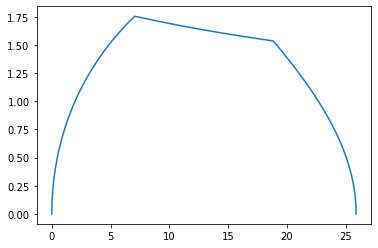

In [18]:
plt.plot(x_i,P0)
print(max(P0))